In [1]:
import game
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d


In [2]:
game = game.Game()
q = game.monte_carlo_control(2000000, 1000)
V = np.amax(q, axis=2)


Populating the interactive namespace from numpy and matplotlib
(10, 21) (10, 21) (10, 21)


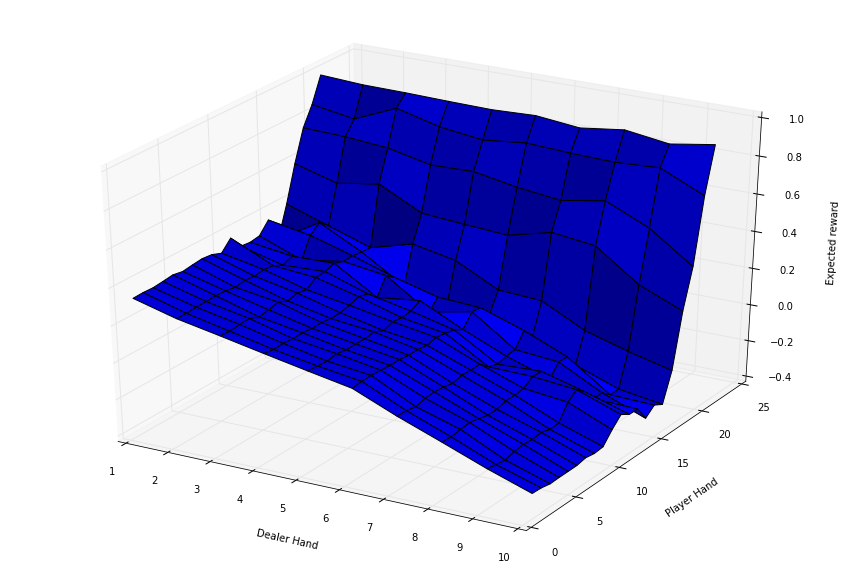

In [3]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)
fig = plt.figure()
x = range(1, 11)
y = range(1, 22)
X, Y = np.meshgrid(x, y, indexing='ij')

print np.shape(X), np.shape(Y), np.shape(V[1:22,1:11].T)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, V[1:22,1:11].T, rstride=1, cstride=1) 
ax.set_xlabel("Dealer Hand")
ax.set_ylabel("Player Hand")
ax.set_zlabel("Expected reward")
plt.show()
